In [ ]:
#Sebastian Vinther assignment 2

In [2]:

!pip install sentence-transformers
!pip install transformers matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 4.0 MB/s eta 0:00:00


In [3]:
#Part 1: SBERT and Semantic Search
#Task Description:
#Create something innovative using SBERT and semantic search, or even more! The guidelines are intentionally broad to encourage creativity. Here are some ideas to get you started:

#Implement a GIF search engine or YouTube search function using images and CLIP.
#(Optional) Use SetFit for supervised tasks with SBERT models.
#Consider building a search engine using a Gradio or Streamlit app.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from sentence_transformers import SentenceTransformer

In [5]:
#load data here
df = pd.read_csv('https://raw.githubusercontent.com/sebvinther/Deep-learning-2/main/bibel_data.csv')

In [6]:
df.head()

,id,b,c,v,t
0,1001001,1,1,1,At the first God made the heaven and the earth.
1,1001002,1,1,2,And the earth was waste and without form; and ...
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God, looking on the light, saw that it was..."
4,1001005,1,1,5,"Naming the light, Day, and the dark, Night. An..."


In [7]:
# defining the simple sentence transformer model

model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31103 entries, 0 to 31102
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31103 non-null  int64 
 1   b       31103 non-null  int64 
 2   c       31103 non-null  int64 
 3   v       31103 non-null  int64 
 4   t       31103 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [10]:
df['t'] = df['t'].astype('str')
df.loc[df['b'] <= 39, 'Testament'] = 'Old'
df.loc[df['b'] > 39, 'Testament'] = 'New'
df

,id,b,c,v,t,Testament
0,1001001,1,1,1,At the first God made the heaven and the earth.,Old
1,1001002,1,1,2,And the earth was waste and without form; and ...,Old
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",Old
3,1001004,1,1,4,"And God, looking on the light, saw that it was...",Old
4,1001005,1,1,5,"Naming the light, Day, and the dark, Night. An...",Old
...,...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le...",New
31099,66022018,66,22,18,For I say to every man to whose ears have come...,New
31100,66022019,66,22,19,And if any man takes away from the words of th...,New
31101,66022020,66,22,20,"He who gives witness to these things says, Tru...",New


In [11]:
df.nunique()

id           31103
b               66
c              150
v              176
t            30704
Testament        2
dtype: int64

In [12]:
df_book_1 = df[df['b']==1]

In [13]:
df_old = df[df['Testament'] == 'Old']
df_new = df[df['Testament'] == 'New']

In [15]:
df_new.shape

(7958, 6)

In [14]:
df_old.shape

(23145, 6)

In [17]:
# defining a variable containing all the verses in a list.
documents = df_new['t'].tolist()

In [18]:
# converting our text data into sentence embeddings

doc_embeddings = model.encode(documents)

In [19]:
doc_embeddings.shape

(7958, 384)

In [20]:

from sentence_transformers import util

def semantic_search(query, doc_embeddings, documents):
  query_embedding= model.encode(query) # Create the sentence embedding for the query
  cosine_similarities = util.pytorch_cos_sim(query_embedding, doc_embeddings)[0] # Calculate the cosine similarity and look up the first one
  closest = np.argmax(cosine_similarities) # Search for the closest embedding
  return documents[closest]

In [28]:
query = "Never Settle for less than deserved."
result = semantic_search(query, doc_embeddings, documents)
print(f"Query: {query}\nBest match: {result}")

Query: Never Settle for less than deserved.
Best match: The poor you have ever with you, but me you have not for ever.


In [24]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl siz

In [25]:
import gradio as gr

In [27]:
markdown = '''
# This app performs semantic search to find the most relevant bible verse to your inspirational instagram quote.
'''


with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            gr.Markdown(markdown)


        with gr.Column():
            gr.Markdown("""
            ## Semantic Search
            """)
            Text = gr.Text(label="Enter your inspirational instagram quote:")
            btn = gr.Button("Find my bible verse!")

            similar = gr.Textbox(label='Most similar bible verse:')
            gr.Examples([["Live, Love, Laugh"], ["Life is a canvas"], ["Embrace the journey"]], inputs=[Text], outputs=[similar])

    btn.click(
        find_similar,
        inputs=[Text],
        outputs=[similar],
    )

if __name__ == "__main__":
    demo.launch()

NameError: name 'find_similar' is not defined

In [ ]:
#part2

In [29]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/sebvinther/Deep-learning-2/main/salary_dataset_similar.csv')

In [30]:
df_1.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.169890,39767.124465
1,1,1.526200,44683.623766
2,2,1.674238,36090.852671
3,3,2.141437,45479.819189
4,4,2.141769,41749.499306


In [31]:
df_1 = df_1[['YearsExperience', 'Salary']]

In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [33]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_1)
data_s = pd.DataFrame(data_scaled, columns=df_1.columns)

In [34]:
w = 1
def nn(x, w):
    return x * w

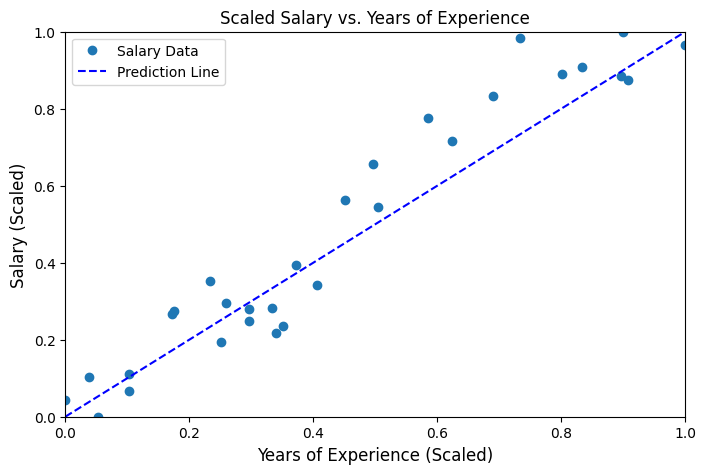

In [37]:
# Plotting function
def plot_data_and_prediction(data, f, w):
    plt.figure(figsize=(8, 5))

    # Plot the scaled salary data
    plt.plot(data.YearsExperience, data.Salary, 'o', label='Salary Data')

    # Plot the prediction line based on the neural network function
    plt.plot([0, 1], [f(0, w), f(1, w)], 'b--', label='Prediction Line')

    # Set the plot labels and title
    plt.xlabel('Years of Experience (Scaled)', fontsize=12)
    plt.ylabel('Salary (Scaled)', fontsize=12)
    plt.axis((0, 1, 0, 1))
    plt.title('Scaled Salary vs. Years of Experience')
    plt.legend(loc='upper left')
    plt.show()

# Use the plotting function
plot_data_and_prediction(data_s, nn, w)

In [38]:
# Defining the parameters
s1_x, s1_t = data_s['Salary'][0], data_s['YearsExperience'][0]
w = 5
learning_rate = 2

# 1. Forward Pass
s1_output = s1_x * w

# 2. FeedForward Evaluation
s1_loss_val = np.mean((s1_t - s1_output)**2)


# 3. Backward Pass / Gradient Calculation
s1_grad_value = np.mean(2 * s1_x * (s1_output - s1_t))
s1_dw = learning_rate * s1_grad_value

# 4. Back Propagation / Update Weights
s1_w = w - s1_dw

print(f"Sample 1: Gradient = {s1_grad_value:.4f}, Δw = {s1_dw:.4f}, w: {s1_w:.4f}, loss: {s1_loss_val:.4f}")


Sample 1: Gradient = 0.0193, Δw = 0.0386, w: 4.9614, loss: 0.0483


In [39]:
s2_x, s2_t = data_s['Salary'][1], data_s['YearsExperience'][1]
w_2 = s1_w
learning_rate = 2

# 1. Forward Pass
s2_output = s2_x * w_2

# 2. FeedForward Evaluation
s2_loss_val = np.mean((s2_t - s2_output)**2)


# 3. Backward Pass / Gradient Calculation
s2_grad_value = np.mean(2 * s2_x * (s2_output - s2_t))
s2_dw = learning_rate * s2_grad_value

# 4. Back Propagation / Update Weights
s2_w = w - s2_dw

print(f"Sample 2: Gradient = {s2_grad_value:.4f}, Δw = {s2_dw:.4f}, w: {s2_w:.4f}, loss: {s2_loss_val:.4f}")


Sample 2: Gradient = 0.0969, Δw = 0.1939, w: 4.8061, loss: 0.2226


In [41]:
#this is taken from one of your notebooks
# Initializing Hyperparameters
epochs = 1
learning_rate = 2

# Initializing Parameters
w = 5

# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
def nn(x, w):
    """Output function y = x * w"""
    return x * w

# 1.2 Loss Function
def loss(y, t):
    """Calculate the Mean Squared Error"""
    return np.mean((t - y)**2)

# 1.3 Optmization Approach
def gradient(w, x, t):
    """Compute the gradient."""
    y = x * w
    return np.mean(2 * x * (y - t))

def delta_w(w_i, x, t, learning_rate):
    """Compute the weight update."""
    return learning_rate * gradient(w_i, x, t)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(data_s['Salary'])):
        x_i, t_i = data_s['Salary'][i], data_s['YearsExperience'][i]

        # 2. Forward Pass
        output = nn(x_i, w)

        # 3. FeedForward Evaluation
        loss_val = loss(output, t_i)

        # 4. Backward Pass / Gradient Calculation
        grad_value = gradient(w, x_i, t_i)  # Compute gradient
        dw = delta_w(w, x_i, t_i, learning_rate)

        # 5. Back Propagation / Update Weights
        w = w - dw

        w_his.append(w)

        # Accumulate loss
        total_loss += loss_val

        # Print gradient, dw, weight, and loss values in a single line
        print(f"Epoch {epoch+1}, Sample {i+1}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

    # Print average loss for the epoch
    avg_loss = total_loss / len(data_s['Salary'])
    print(f"Epoch {epoch+1}: Average Loss = {avg_loss:.4f}\n")

Epoch 1, Sample 1: Gradient = 0.0193, Δw = 0.0386, w: 4.9614, loss: 0.0483
Epoch 1, Sample 2: Gradient = 0.0969, Δw = 0.1939, w: 4.7675, loss: 0.2226
Epoch 1, Sample 3: Gradient = 0.0000, Δw = 0.0000, w: 4.7675, loss: 0.0029
Epoch 1, Sample 4: Gradient = 0.0970, Δw = 0.1939, w: 4.5736, loss: 0.1866
Epoch 1, Sample 5: Gradient = 0.0279, Δw = 0.0558, w: 4.5178, loss: 0.0425
Epoch 1, Sample 6: Gradient = 0.5502, Δw = 1.1003, w: 3.4175, loss: 1.0649
Epoch 1, Sample 7: Gradient = 0.4154, Δw = 0.8307, w: 2.5867, loss: 0.5763
Epoch 1, Sample 8: Gradient = 0.0959, Δw = 0.1918, w: 2.3950, loss: 0.0616
Epoch 1, Sample 9: Gradient = 0.4327, Δw = 0.8654, w: 1.5295, loss: 0.3753
Epoch 1, Sample 10: Gradient = 0.0415, Δw = 0.0830, w: 1.4466, loss: 0.0070
Epoch 1, Sample 11: Gradient = 0.0994, Δw = 0.1989, w: 1.2477, loss: 0.0283
Epoch 1, Sample 12: Gradient = -0.0275, Δw = -0.0549, w: 1.3026, loss: 0.0034
Epoch 1, Sample 13: Gradient = -0.0245, Δw = -0.0490, w: 1.3516, loss: 0.0032
Epoch 1, Sample 1

In [42]:
#last part - attention

In [ ]:
#chosen sentences is "he was a great player" and "The animals were behaving nicely in the zoo"

In [43]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_1 = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Encode text
text_1 = "He was a great player"
inputs_1 = tokenizer(text_1, return_tensors="pt")

# Get model output
with torch.no_grad():
    outputs = model_1(**inputs_1)

# Extract attentions
attentions_1 = outputs.attentions  # Tuple of 12 (one per layer) matrices of shape (batch_size, num_heads, sequence_length, sequence_length)

# For simplicity, we'll use the attention weights from the first layer and the first head.
attention_1 = attentions_1[0][0, 0, :, :].detach().numpy()

# Tokenize the text to match tokens with attention weights
tokens_1 = tokenizer.tokenize(tokenizer.decode(inputs_1['input_ids'][0]))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [44]:
# Encode text
text_2 = "The animals were behaving nicely in the zoo"
inputs_2 = tokenizer(text_2, return_tensors="pt")

# Get model output
with torch.no_grad():
    outputs = model_1(**inputs_2)

# Extract attentions
attentions_2 = outputs.attentions  # Tuple of 12 (one per layer) matrices of shape (batch_size, num_heads, sequence_length, sequence_length)

# For simplicity, we'll use the attention weights from the first layer and the first head.
attention_2 = attentions_2[0][0, 0, :, :].detach().numpy()

# Tokenize the text to match tokens with attention weights
tokens_2 = tokenizer.tokenize(tokenizer.decode(inputs_2['input_ids'][0]))

<ipython-input-45-ad93e00441eb>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([''] + tokens_1, rotation=90)
<ipython-input-45-ad93e00441eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels([''] + tokens_1)
<ipython-input-45-ad93e00441eb>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([''] + tokens_2, rotation=90)
<ipython-input-45-ad93e00441eb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels([''] + tokens_2)


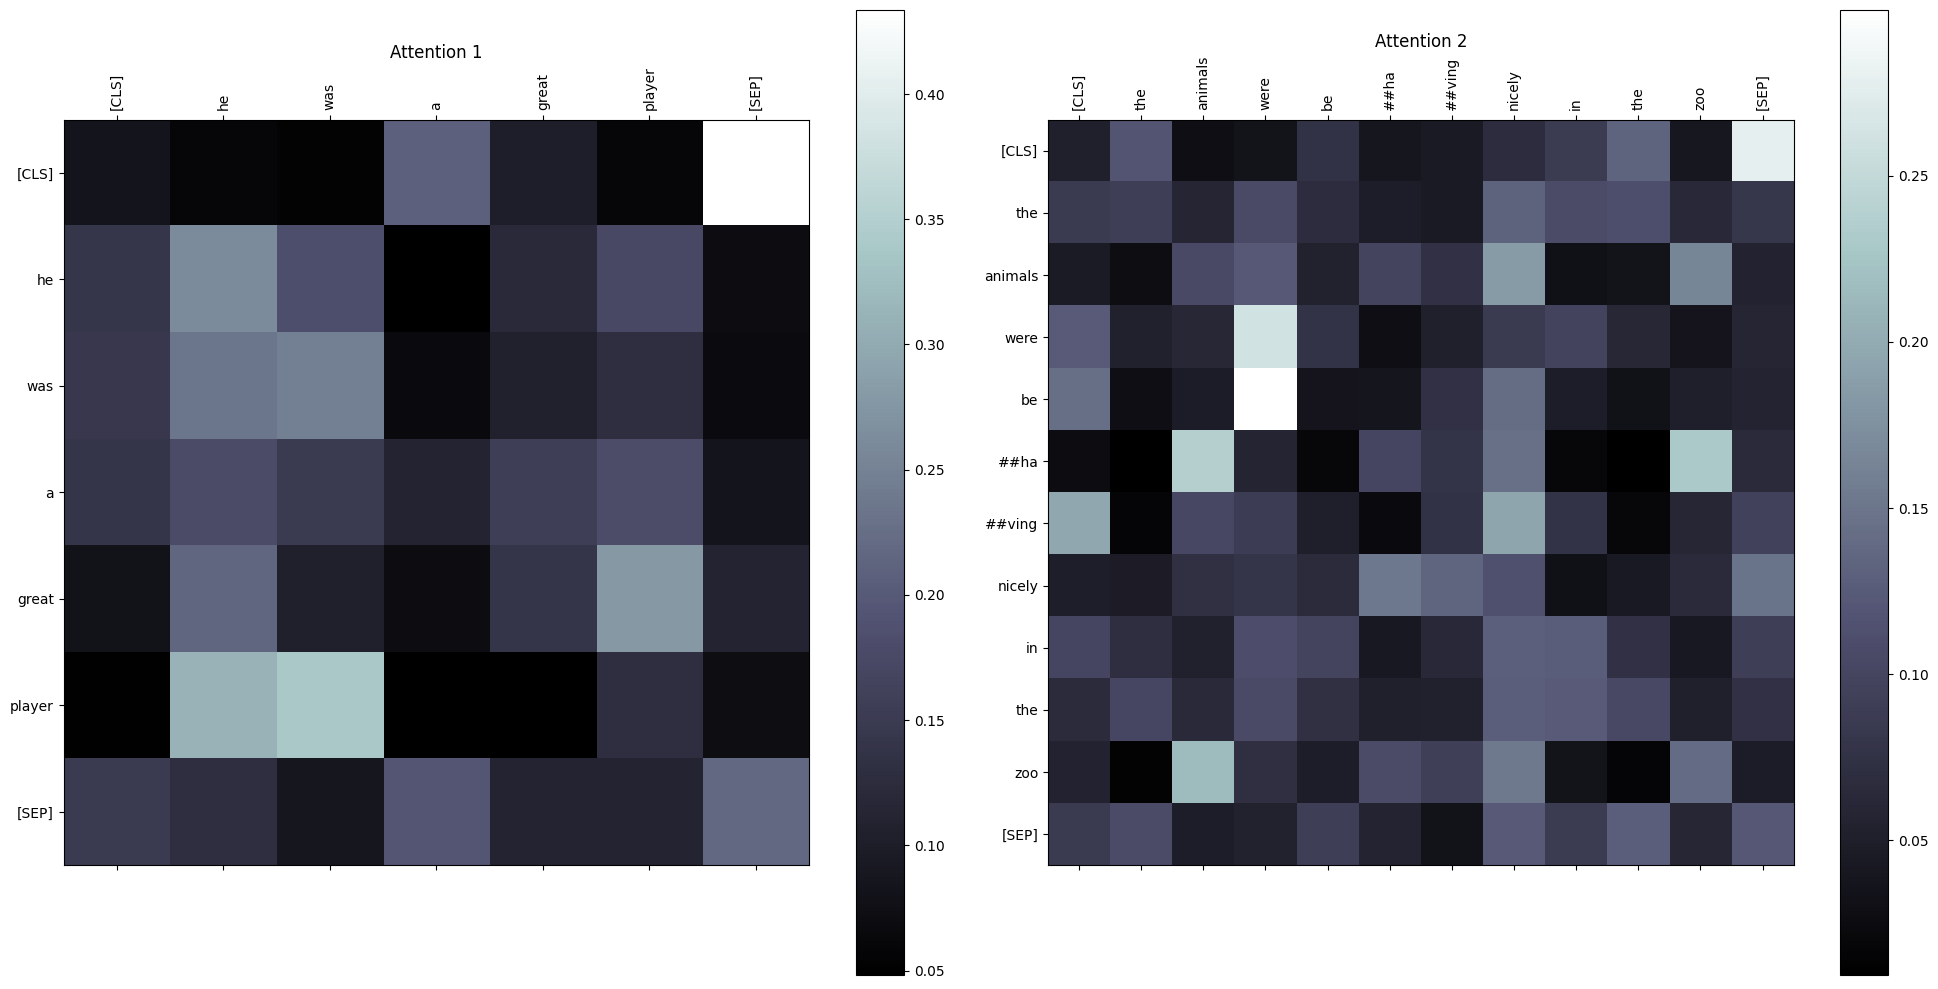

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Visualize attention_1
cax1 = axs[0].matshow(attention_1, cmap='bone')
fig.colorbar(cax1, ax=axs[0])
axs[0].set_xticklabels([''] + tokens_1, rotation=90)
axs[0].set_yticklabels([''] + tokens_1)
axs[0].xaxis.set_major_locator(plt.MultipleLocator(1))
axs[0].yaxis.set_major_locator(plt.MultipleLocator(1))
axs[0].set_title('Attention 1')

# Visualize attention_2
cax2 = axs[1].matshow(attention_2, cmap='bone')
fig.colorbar(cax2, ax=axs[1])
axs[1].set_xticklabels([''] + tokens_2, rotation=90)
axs[1].set_yticklabels([''] + tokens_2)
axs[1].xaxis.set_major_locator(plt.MultipleLocator(1))
axs[1].yaxis.set_major_locator(plt.MultipleLocator(1))
axs[1].set_title('Attention 2')

plt.tight_layout()
plt.show()